---
<h1 style="text-align: center;">
CSCI 4521: Applied Machine Learning (Fall 2024)
</h1>

<h1 style="text-align: center;">
Homework 6
</h1>

<h3 style="text-align: center;">
(Due Tue, Dec. 10, 11:59 PM CT)
</h3>

---

![mnist.png](attachment:a66dea12-a8dc-4cd9-b987-36f0ffe55f5d.png)

Image from https://en.wikipedia.org/wiki/MNIST_database

### **Problem 1. (75 points)** In this problem, your task is to build and train a convolutional neural network (CNN) to classify hand-written digits. We will use the MNIST dataset where each data point is an image of a hand-written digit and its label indicates the value of the digit written ($0, 1, \dots, 9$). Use the provided code (in `hw6_utils.py`) to load and normalize the data in this homework (you do not need to do any other preprocessing). Your CNN must have the following architecture:
- #### Input: 1-channel input image of size 28x28 pixels
- #### Convolution layer: Convolution kernel of size (3, 3) with a stride of 1, dilation of size 1, and bias. Number of input channels: 1; Number of output channels: 20; Do not use any padding
- #### ReLU activation function
- #### Max pool: 2x2 kernel size with stride of 2
- #### Dropout layer with probability $p=0.50$
- #### Flatten input for fully-connected layers
- #### Fully-connected layer 1. Input is flattened output from conv layer with bias; Number of output nodes: 128
- #### ReLU activation function
- #### Dropout layer with probability $p=0.50$
- #### Fully-connected layer 2: Number of input nodes: 128 and bias; Number of output nodes: 10
- #### Softmax activation function on output layer (note, you do not need to specify this anywhere, it is included when using cross entropy loss `torch.nn.CrossEntropyLoss()`.

### Train your CNN for $N$ epochs (you must decide $N$) on all the training data using vanilla SGD (e.g., `torch.optim.SGD()`) as the optimizer with mini batches of size 32 images and cross entropy loss (e.g., `torch.nn.CrossEntropyLoss()`). In each epoch, print out the cumulative training loss, training error rate, cumulative test loss, and test error rate. Once training has converged (you must decide when this happens), apply your learned model to the test set one last time and print out the cumulative test loss and test error rate. Also, randomly select 5 images which your model incorrectly predicted and plot the images. What is the correct label and what is the label your network predicted for each of the 5 images? Why do you think your model misclassified these images?

### You must use **PyTorch** to build and train your neural network, no other packages will be accepted (for example, you cannot use Tensorflow). If you use anything other than PyTorch to build your network, you will receive no credit for this homework.

### Write your code and display your figures here

In [2]:
import numpy as np
from hw6_utils import load_MNIST, convert_data_to_numpy, plot_points

np.random.seed(2024)

batch_size = 32

normalize_vals = (0.1307, 0.3081)

# load MNIST dataset
train_dataset, test_dataset, train_loader, test_loader = load_MNIST(batch_size, normalize_vals)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 52.7MB/s]


Extracting MNIST-data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.82MB/s]

Extracting MNIST-data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 11.9MB/s]


Extracting MNIST-data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST-data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.68MB/s]

Extracting MNIST-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw



In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F


**Creation of convolutional nueral network**

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 20, kernel_size=3, stride=1, dilation=1, bias=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(3380, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.dropout(x)
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x






learning rate: 0.1

Epoch 0, Train Loss: 0.3225131729240219, Train Error Rate: 0.10103333333333331, learning rate: 0.1
Epoch 0, Test Loss: 0.0887315220584663, Test Error Rate: 0.02949999999999997, learning_rate: 0.1
Epoch 1, Train Loss: 0.16151029759645463, Train Error Rate: 0.04981666666666662, learning rate: 0.1
Epoch 1, Test Loss: 0.06367035275465119, Test Error Rate: 0.01990000000000003, learning_rate: 0.1
Epoch 2, Train Loss: 0.1347886462641492, Train Error Rate: 0.04153333333333331, learning rate: 0.1
Epoch 2, Test Loss: 0.05319379606223669, Test Error Rate: 0.017900000000000027, learning_rate: 0.1

learning rate: 0.01

Epoch 0, Train Loss: 0.10333527327549333, Train Error Rate: 0.03180000000000005, learning rate: 0.01
Epoch 0, Test Loss: 0.04321179830301658, Test Error Rate: 0.014900000000000024, learning_rate: 0.01
Epoch 1, Train Loss: 0.09173673461245684, Train Error Rate: 0.027900000000000036, learning rate: 0.01
Epoch 1, Test Loss: 0.042006323812343475, Test Error Rate: 0.0

<ipython-input-31-c4691e8d595f>:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  final_model.load_state_dict(torch.load('./mnist_cnn.pth'))



Final Evaluation on Test Set:
final learning rate parameter : 0.01
Cumulative Test Loss: 0.0399
Cumulative Test Error Rate: 0.0138


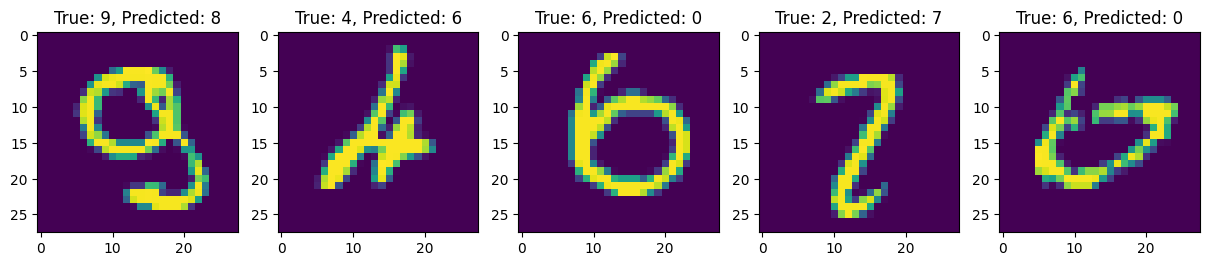

In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()


num_epochs = 3
min_test_loss = 100000000
learning_rate_param=[0.1,0.01]
for learning_rate in learning_rate_param:
  print(f"\nlearning rate: {learning_rate}\n")
  optimizer = optim.SGD(net.parameters(),lr=learning_rate)
  for epoch in range(num_epochs):
     net.train()
     running_loss=0
     right=0
     total=0
     for data in train_loader:
        Xpart=data[0]
        ypart=data[1]
        inputs = Xpart
        labels = ypart
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss =running_loss+ loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        right = right+(predicted == labels).sum().item()

     train_loss = running_loss / len(train_loader)
     train_error_rate = 1 - (right / total)
     print(f"Epoch {epoch}, Train Loss: {train_loss}, Train Error Rate: {train_error_rate}, learning rate: { learning_rate }")


     net.eval()
     test_loss = 0
     test_correct = 0
     test_total = 0
     with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

     test_loss =test_loss/ len(test_loader)
     test_error_rate = 1 - (test_correct / test_total)
     print(f"Epoch {epoch}, Test Loss: {test_loss}, Test Error Rate: {test_error_rate}, learning_rate: {learning_rate}")
     if test_loss<min_test_loss:
      # evaluate model with lowest test loss

        torch.save(net.state_dict(), './mnist_cnn.pth')
        lowest_learning_rate=learning_rate





final_model = Net()
final_model.load_state_dict(torch.load('./mnist_cnn.pth'))
final_model.eval()
# Evaluation of final model
final_test_loss = 0
final_test_correct = 0
final_test_total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = final_model(inputs)
        loss = criterion(outputs, labels)
        final_test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        final_test_total += labels.size(0)
        final_test_correct += (predicted == labels).sum().item()


final_test_loss = final_test_loss / len(test_loader)
final_test_error_rate = 1 - (final_test_correct / final_test_total)

print("\nFinal Evaluation on Test Set:")
print(f"final learning rate parameter : {lowest_learning_rate}")
print(f"Cumulative Test Loss: {final_test_loss:.4f}")
print(f"Cumulative Test Error Rate: {final_test_error_rate:.4f}")

#  Fiding mis classifications part

final_model.eval()
misclassified_img = []
true_labels = []
predicted_labels = []
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = final_model(inputs)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(labels)):
            if predicted[i] != labels[i] and len(misclassified_img)<5:
                misclassified_img.append(inputs[i])
                true_labels.append(labels[i])
                predicted_labels.append(predicted[i])


fig, ax = plt.subplots(ncols=5,nrows=1,figsize=(15, 5))
for i in range(len(misclassified_img)):
    ax[i].imshow(misclassified_img[i].squeeze())
    ax[i].set_title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")

plt.show()


### Answer the text questions here


# Report

**Training and loading data and normalization**


To load the data I simply used the function load Mnist which took the number of batches and my normalization values and returned the data sets for train and test along with train loader and test loader. The normalizations seems to be done in the function.


**choosing the right N**


For the right N for the number of epochs I decided it based on how long it took to run and and how decent of a model it provided. From what I experimented I found that optimal n was 3.




**Training model**


To train the model I simply decided to apply forward and back prop steps for n epochs and see how well the model formed. For the neural net I followed the instructions to a tee and designed it the exact same way that it was given the instructions. For the output layers fc1 I initially struggled to find what the number of nodes was going in after the flattening, however I just figured out the size of it after the flattening part and used that. For the optimizer function I used Sgd where I mainly tuned the learning rate. I did this as any more parameters I would try to tune would result in a more complex and time consuming model which I did not want. The main choices I provided for my learning rate function were 0.1 and 0.01 where for models which I had worked previously these tended to work the best. For the loss function I simply chose the cross entropy optimizer as it was provided by the instructions. The main way I chose the best model is through figuring out which model had the lowest test loss as if I relied on the train loss it would likely lead to overfitting to the data. For printing of data I simply printed out what the train error rate per epoch which I got by subtracting 1-accuracy for the epoch train loss or average train loss where I summed up the loss for that epoch and divide it up by batch size I did the same thing for the testing loss and test error rate part. For the loss function I simply used the cross entropy loss function as provided by instructions.


**Explanation of images misclassified**


Image one: The image was misclassified as an eight while it was truly a nine. The main reason for this occurs although the classified image is a nine it seems to look like a eight due to its bottom line going upward. I believe that it classified it  as eight as it had too many similarities with how an eight would look.


Image2: The second image was misclassified as a four while it was in fact a six. This could be due to the compressed nature of the four leading it to have some similarities with a six


image3: The image was classified as 0 while in fact it is a six. This makes a lot of sense as the six basically looks like a big zero with a line attached to it so as the circle part of this six was very large it could have interpreted it as a zero.


Image 4:  Image five was classified as a two while it in fact was a seven. The main reason I believe that it misclassified this as the seven had extra curved lines on the bottom making it kind of look like a two.


image5 :The image was classified as a zero while it was a six. This happened due to the same reason of image 3 where the 0 where the circular part of the six part was so large it led to the misclassification of it as zero. This repeated pattern of sixes being misclassified as zeros may indicate that there is less variances in feature between these classes.


Through analyzing the five images I have realised there are two main contributors to why the model gets an image classification wrong. First is that the Image itself is an anomaly where it shares features with another class. The second reason why it could be wrong is due to the fact that the class and another class share similar features so when classifying them we can accidentally mistake one for another.


**Final model performance**


After training my model for three epochs I  finally got a test loss and error rate  0.0399, 0.0138 which I believe to be quite low. I used loss and accuracy as my primary indicator of how well the model was performing so a low loss and error rate indicate that this model is performing quite well.


### **Problem 2. (25 points)** In this problem, your task is to apply principal component analysis (PCA) to the MNIST dataset to reduce the dimensionality of each image from 784 to 2 and visualize the images in the lower-dimensional subspace. Apply PCA to all the training data to learn the projection vector. Then, project each image in the training dataset to $\mathbb{R}^2$. Use the provided plotting function `plot_points()` (in `hw6_utils.py`) to plot each projected image as a point in a 2-dimensional figure where the x-axis is principal component 1 and the y-axis is principal component 2. Color each point in the figure according to the label of each image so we can visualize how well PCA reduced the dimensionality according to how closely the images are grouped by label. (Note, only use the labels to visualize how well PCA did, do not use the labels anywhere else.) What are your observations from the figure? Where did PCA reduce the dimensionality well and where did it not do well? Note, you may get some complex numbers when computing the eigenvalues and eigenvectors. You can use `np.real()` to only keep the real part.


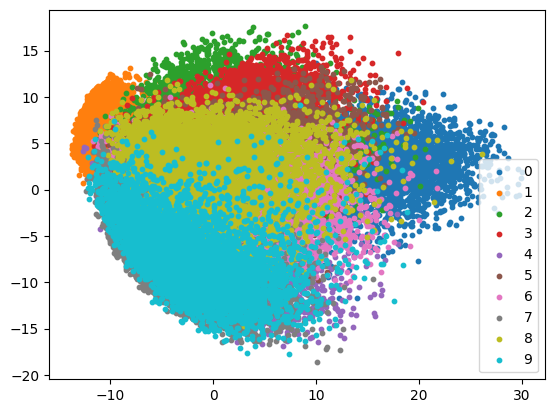

In [21]:
from sklearn.decomposition import PCA


X, y = convert_data_to_numpy(train_dataset)
Pc=PCA(n_components=2)
X_train_pca=Pc.fit_transform(X)
X_train_pca=np.real(X_train_pca)
plot_points(X_train_pca[:,0],X_train_pca[:,1],y,"mnist_pca")


### Answer the text questions here

PCA works well for separating digits with high variance features, such as 0 and 1 where they have a decent amount of difference leading to the having certain amount of seperation.This sort of seperation makes as they have a lot of difference from one another where one is just straight line while a zero is just an oval .The main problem is however that the  PCA struggles with digits that share similar features, such as 4,5,6,7,8,9, as their overlapping boundaries make the spread less distinct which in may lead to some level of misclassiffication. This may be due to the fact that the PCA is limited to capturing linear relationships and fails to separate data with nonlinear manner. The pca seems to capturing the the variance of the data differetly as well where for some of the feature such as nine are much more spread out well indicating it is capturing it well where on the other hand for than six it has much smaller spread indicating it is not capturing it as well.

### **Extra Credit 1. (3 points)** Describe how to split the data to train a machine learning model (e.g., SVM). Make sure to describe two ways, one using cross validation and another without using cross validation. Explain why we split the data in these ways and what can happen if the data is split incorrectly.

### Answer the questions here

One way to do this is by using cross-validation, where the data is divided into k-folds. The model is trained on k-1  folds and uses the last fold as a validation set to check the performance of the model at that fold. This whole process is repeated k times so that each fold serves as a validation . This method provides a pretty good estimate of model performance by using all data points for both training and validation. After doing this the result would provide a cross val score which indicates how well or badly the model performed. By training the data on folds it helps in reducing overfitting as rather than being trained on the entire data at once it is trained on chunks of the data. The main problem with this type of method is when there is a significant imbalance in the data one class is represented too much relative to another may hurt this type of method. To guarantee  the folds are balanced, other techniques like stratified folding need to be implemented in order to ensure that the model is training on equal proportions of fold. Another disadvantage for this type of validation is that it may be too computationally intensive for large amounts of data like data we had to use Pyspark for  so constantly spitting them may be too slow and resource intensive.


Another approach is splitting the dataset into two subsets of train and test split.The train split contains around 70 percent of the data while the test split contains around 30 percent of the data. Where I would use the model on the train and check it on the test. This sort of method generally is much quicker to run compared to the k fold method however it suffers from the problem of generalizability where unless the train and test is balanced in terms of the classes they represent the somewhat true distribution, it may provide inconsistent results. You could improve this generalizability by creating new data points to make the data more balanced and shuffling the data before splitting it to improve this generalizability.


Splitting data is critical  to reduce any sort of overfitting, and helps to guarantee that the model generalizes with the data. Not Splitting  can lead to biased models which tend to often over fit  and only perform well on the train data but perform very poorly when actually deployed. Even after splitting one can still be careless and do this spitting incorrectly. Some examples of mistakes which could occur while splitting may include data leakage where you accidentally use your test data to train the model. When data leakage occurs when you get false sense that the model is very effective however when you run it on a future data it would generally work more poorly relative to if you had been more careful. As a result I believe that careful data splitting, whether through cross-validation or direct splitting is essential for reliable model development.




### **Extra Credit 2. (10 points)** In this problem, your task is to segment an image using $k$-means. We can use $k$-means to cluster pixels with similar (color) values together to generate a segmented or compressed version of the original image. Apply $k$-means to the provided image `umn_csci.png`. For each $k=\{3,5,7\}$, generate a segmented image and compute the cumulative loss (i.e., distortion measure from the lecture notes). (Note, it may be helpful to test on a smaller version of the image `umn_csci.png` to ensure your code works but report final results on the full version.)

### Write your code and display your figures here

For loss k=3: 150752309.67945632



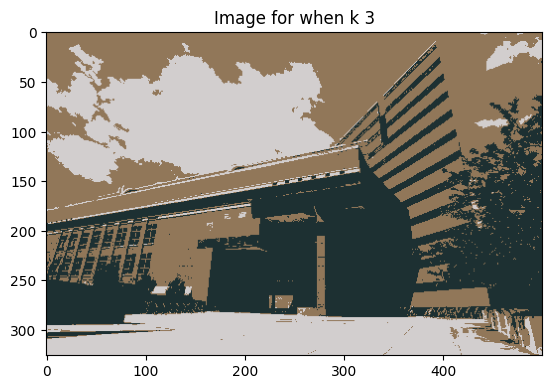

For loss k=5: 150752309.67945632



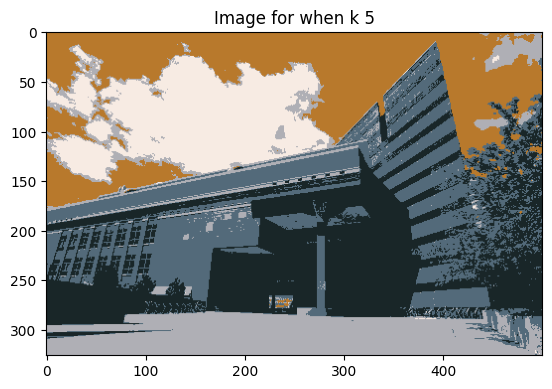

For loss k=7: 150752309.67945632



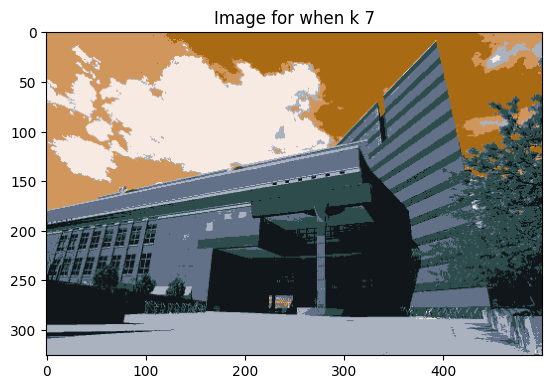

In [53]:
import cv2
from sklearn.cluster import KMeans

image = cv2.imread("umn_csci.png")
pixels = image.reshape(-1, 3)
pixel= np.float64(pixels)
k = [3,5,7]

for i in range(0,len(k)):
    kmeans=KMeans(n_clusters=k[i], random_state=42)
    kmeans.fit(pixels)
    cluster=kmeans.cluster_centers_[kmeans.labels_].astype(float)
    Cummulative_loss= np.sum((pixels - clust) ** 2)

    segmented=cluster.reshape(image.shape)

    segmented=segmented/255
    segmented=np.float64(segmented)
    loss=np.float64(loss)

    the_path="umn_csci_segmented_k"+str(k[i])+".png"
    plt.imsave(the_path, segmented)

    print(f"For loss k={k[i]}: {Cummulative_loss}\n")
    plt.figure()
    plt.title(f"Image for when k {k[i]}")
    plt.imshow(segmented)
    plt.show()


# Future plans and coclustion

The main thing I learnt throughout this coding is that there is lot I still have to learn due to the fact that there are several more techniques.

What I plan to do with this knowledge is to try applying what I learnt for this homework and the other homework for independent project.